In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import collections
from itertools import chain
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('final_mfrc_data.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61226 entries, 0 to 61225
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        61226 non-null  object
 1   subreddit   61226 non-null  object
 2   bucket      61226 non-null  object
 3   annotator   61226 non-null  object
 4   annotation  61226 non-null  object
 5   confidence  61184 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


In [4]:
list_words = []
for row in df["annotation"]:
    words = row.split(',')
    word_counts = collections.Counter(words)
    list_words.append(words)
    flat_list = list(chain.from_iterable(list_words))
unique_words = set(flat_list)

In [10]:
# Get the unique words
annotator_data = [{'annotator': row[0], 'annotation': row[1]} for row in df[['annotator', 'annotation']].values]
# Get the counts of each word
labels = [{'Non-Moral': row['annotation'].count('Non-Moral'), 'Thin Morality': row['annotation'].count('Thin Morality'), 'Care': row['annotation'].count('Care'), 'Equality': row['annotation'].count('Equality'), 'Authority': row['annotation'].count('Authority'), 'Proportionality': row['annotation'].count('Proportionality'), 'Loyalty': row['annotation'].count('Loyalty'), 'Purity': row['annotation'].count('Purity')} for row in annotator_data]
# Convert to a dataframe
labels = pd.DataFrame(labels)
# Sum the counts
labels = labels.sum(axis=0)


In [22]:
annotators = ['annotator00', 'annotator01', 'annotator02', 'annotator03', 'annotator04', 'annotator05']

# for each annotator, sum up the labels in annotator data
annotator_labels = []
for annotator in annotators:
    # get the annotations for this annotator
    annotations = [row['annotation'] for row in annotator_data if row['annotator'] == annotator]
    # split the annotations into a list of labels
    annotations = [annotation.split(',') for annotation in annotations]
    # flatten the list of lists
    annotations = [item for sublist in annotations for item in sublist]
    # count the labels
    counts = collections.Counter(annotations)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_labels.append(counts)

# convert the array of dicts to a dataframe
annotator_labels = pd.DataFrame(annotator_labels)
# set the index to the annotator
annotator_labels = annotator_labels.set_index('annotator')
# transpose the dataframe so that the labels are the columns
annotator_labels = annotator_labels.T


### Box plot
Bar graph filled with all the bars like the storage on your phone

In [43]:
names = list(labels.index)
values = labels.values

# Plot using plotly express
fig = px.pie(labels, values=values, names=names, title='Moral Foundations Label Distribution')
fig.show()



### Histogram
Yaga

In [16]:
# create the plot with plotly express and set the color sequence to reds_r and also set label names
fig = px.histogram(labels, x=labels.index, y=[labels.values], color=labels.values, color_discrete_sequence=px.colors.sequential.Reds_r)
# show the plot
fig.show()



In [28]:
fig = px.histogram(df, x='annotation', color='annotator', title = 'Annotation Distribution by Annotator', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Heatmap 
Yaga

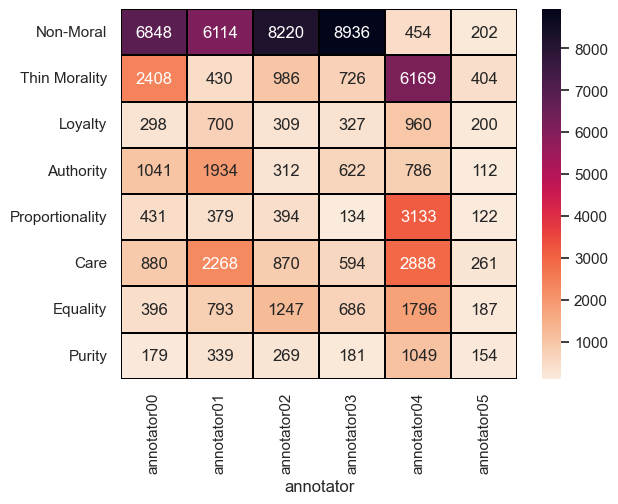

In [60]:
#Heatmap of annotator labels
sns.heatmap(annotator_labels.T, annot=True, fmt='d',cmap='rocket_r', linewidths=0.1, linecolor='black');

C:\Users\Sinan\AppData\Local\Temp\ipykernel_5292\1901996316.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ValueError: zero-size array to reduction operation fmin which has no identity

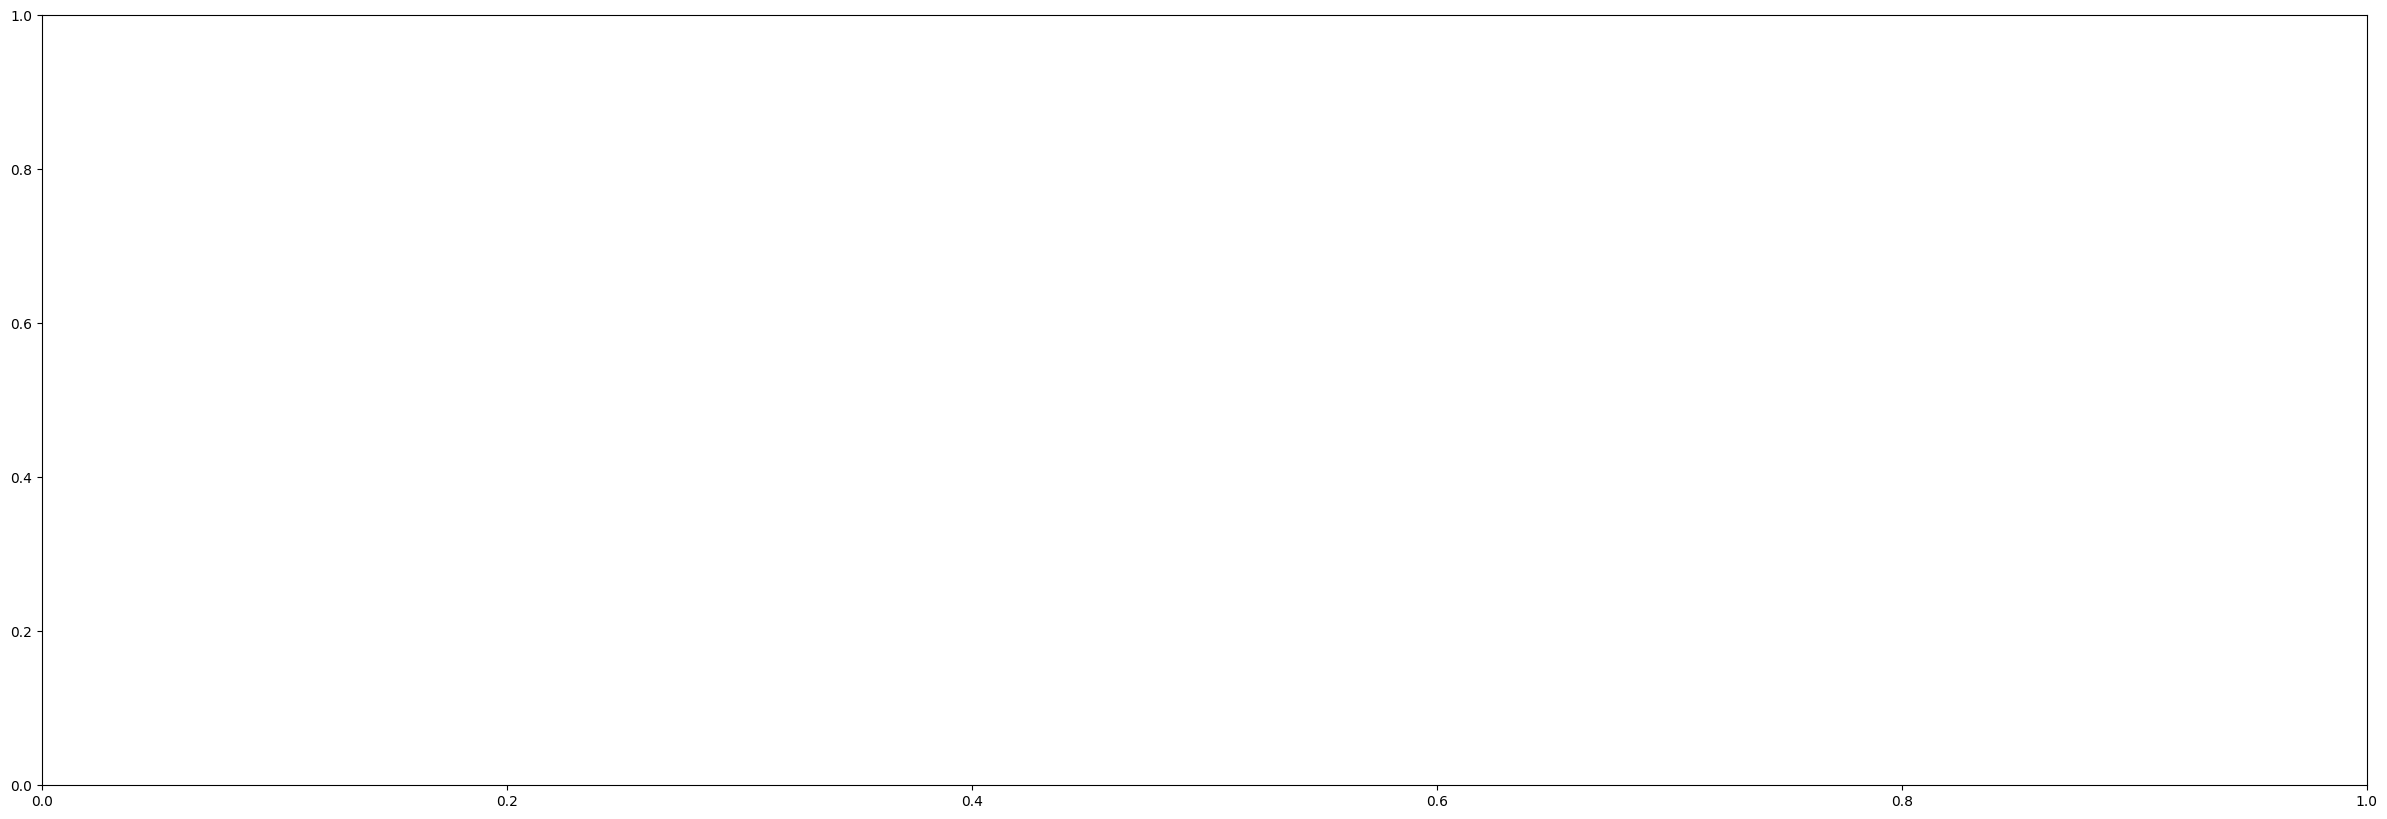

In [29]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = df.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')